In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import numpy as np
from skimage import data
from skimage import color, morphology
from scipy import signal
%matplotlib inline

In [2]:
hdul = fits.open('jbit11e1q_flc.fits')

In [3]:
hdata = hdul[1].data.astype('float64')
print(hdata.size)

8388608


In [4]:
hdul[1].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 2048 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2021-12-18' / date this file was written (yyyy-mm-dd)                
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'jbit11e1q        

69.25271896122499


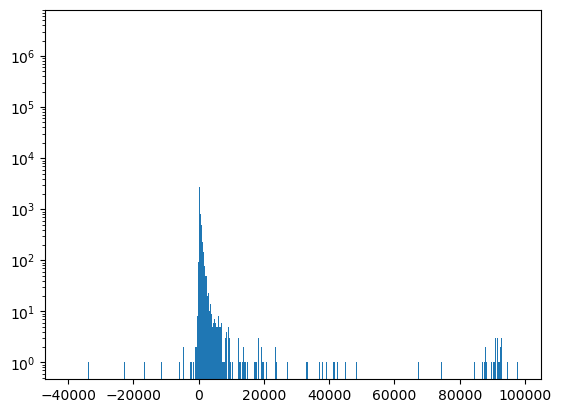

In [5]:
n, bins, _ = plt.hist(hdata.flatten(),bins=10000, log=True)
mean = np.mean(hdata)
img = hdata.copy()
print(mean)
img[hdata>mean]=1
img[hdata<=mean]=0

3790819.0 2911


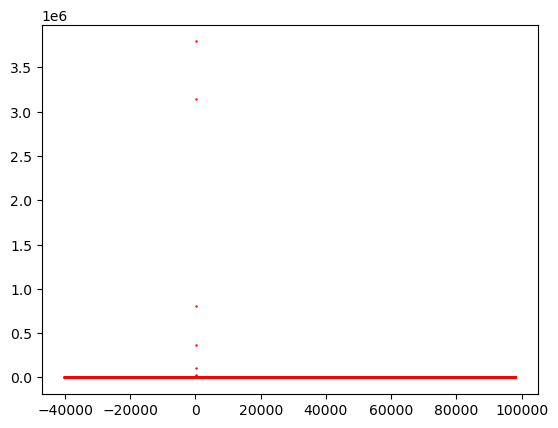

In [6]:
plt.scatter(bins[:-1],n,s=0.5,color='r')
print(max(n),np.argmax(n))


(array([7776286.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,  612322.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

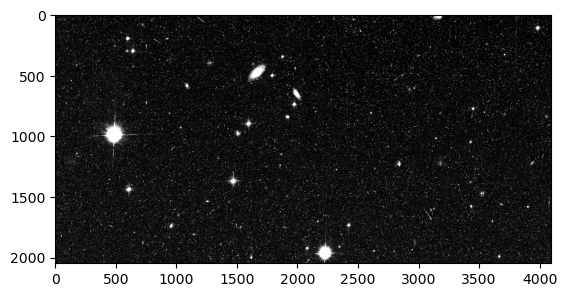

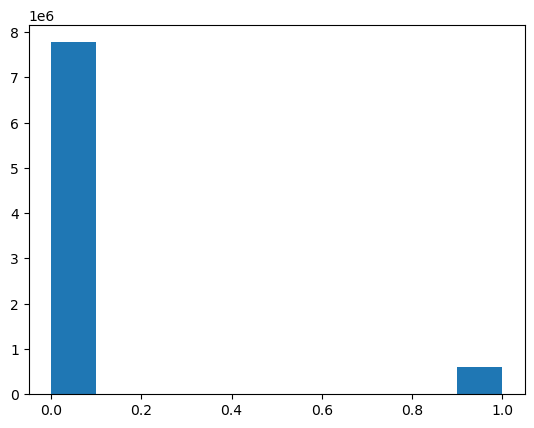

In [7]:
plt.imshow(img,'gray')
plt.figure()
plt.hist(img.flatten())

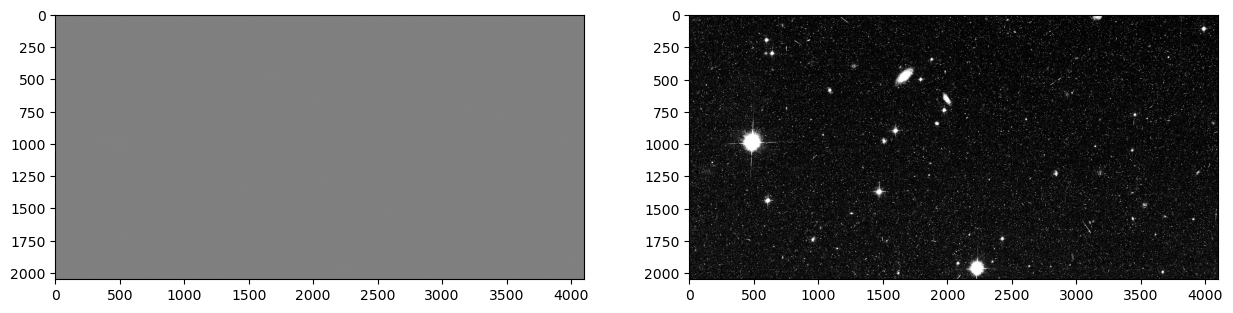

In [8]:
#img = data.camera()

kernel = np.array([[-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]])

kernel1 = np.array([[2,-1,-1],
                   [-1,2,-1],
                   [-1,-1,2]])

res = signal.convolve2d(img, kernel)

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.imshow(res,'gray')
plt.subplot(122)
plt.imshow(img, 'gray')



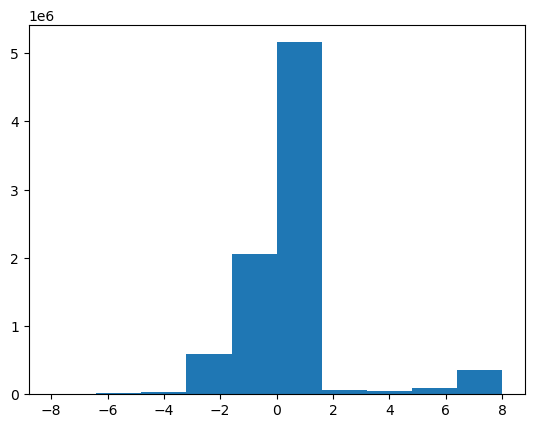

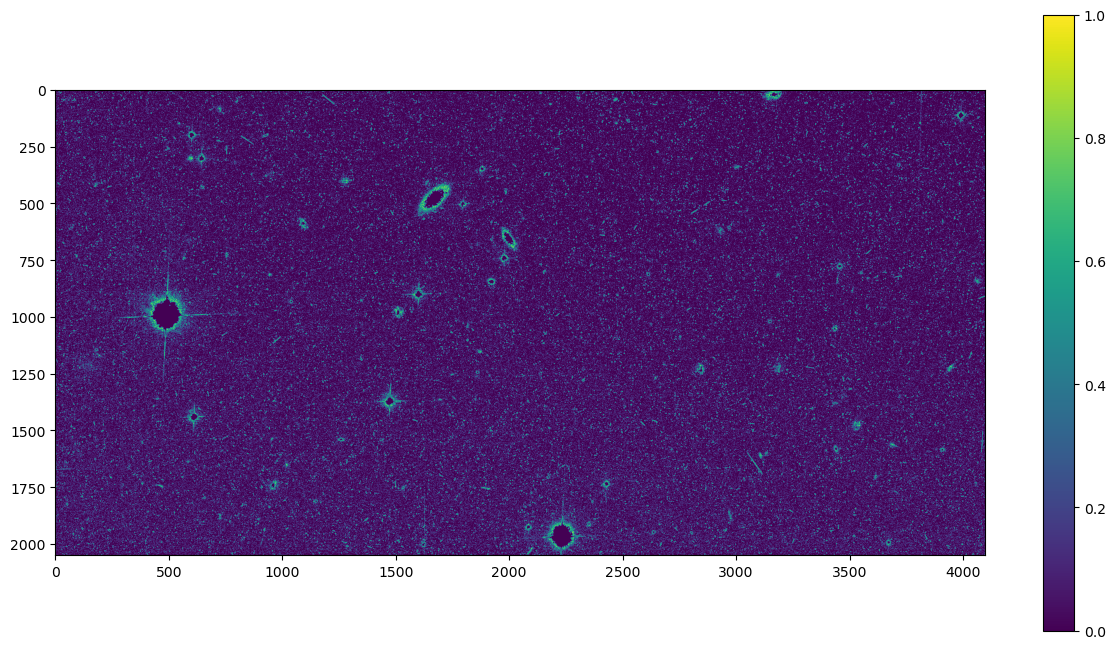

In [88]:

plt.hist(res.flatten())
res[res>0]=1
res[res<=0]=0
plt.figure(figsize=(15,8))
plt.imshow(res)
plt.colorbar()

In [89]:
plt.imshow(img-res)

ValueError: operands could not be broadcast together with shapes (2048,4096) (2050,4098) 

6000


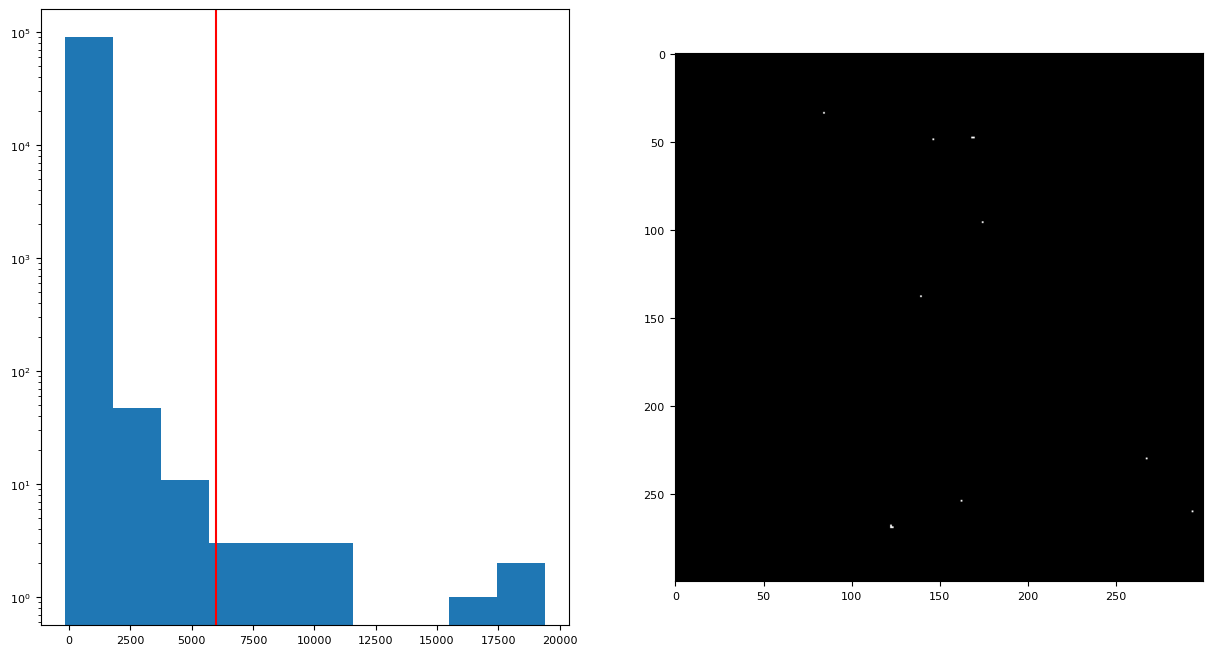

In [474]:
from skimage.filters import threshold_otsu,threshold_mean

img = data[:300,:300].copy()
img1=img.copy()
threshold = np.mean(img)
threshold=6000
print(threshold)
img1[img>threshold]=1
img1[img<=threshold]=0
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(img.reshape(-1), log=True)
plt.axvline(threshold, color='r')
plt.subplot(122)
plt.imshow(img1,'gray')

In [13]:
from skimage import data
from skimage import color, morphology


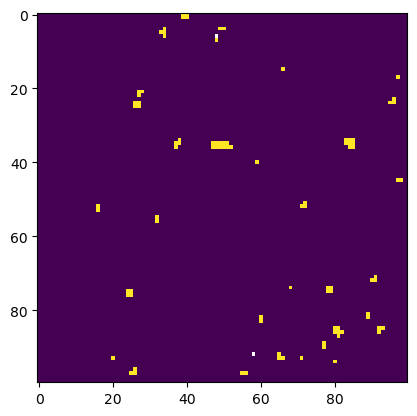

In [77]:
sect = data2[:100,:100]
plt.imshow(sect)

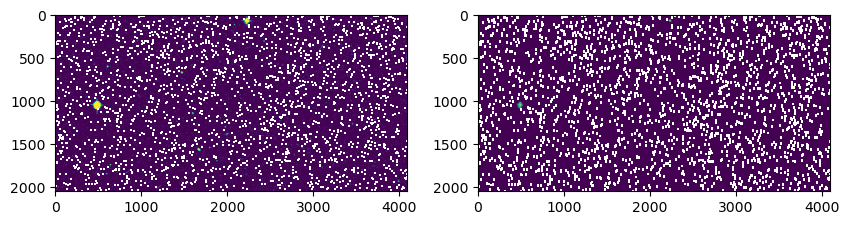

In [74]:
footprint = morphology.disk(10)
res = morphology.erosion(data2, footprint)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(data2)
plt.subplot(122)
plt.imshow(res*data1)

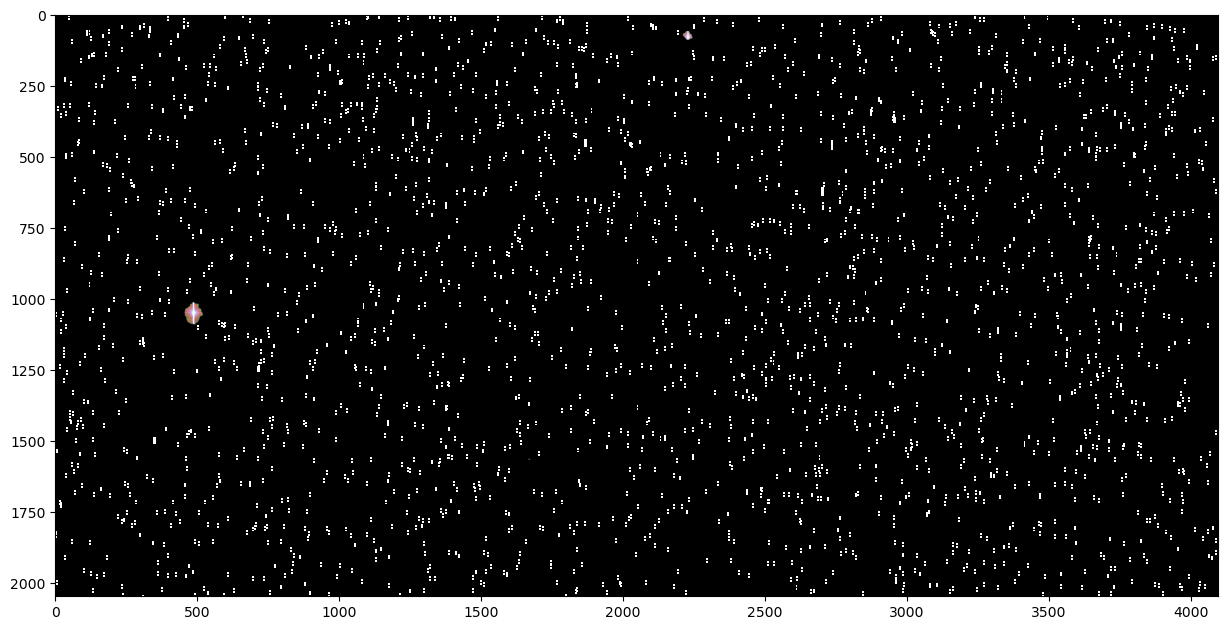

In [38]:
plt.figure(figsize=(15, 10))
plt.imshow(res*data1,cmap='cubehelix')

In [32]:
data3 = data2*data1
plt.figure(figsize=(15, 10))
plt.imshow(data3, cmap="cubehelix")
plt.colorbar()


NameError: name 'data2' is not defined

In [75]:
np.flip(res, axis=0)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [76]:
finalData = res*hdul[1].data
hdu = fits.PrimaryHDU(data=finalData)

In [71]:
hdu.writeto('my.fits')

/Users/urahyou/opt/miniconda3/envs/astro_urahyou/lib/python3.7/site-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/Users/urahyou/opt/miniconda3/envs/astro_urahyou/lib/python3.7/site-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Users/urahyou/opt/miniconda3/envs/astro_urahyou/lib/python3.7/site-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/Users/urahyou/opt/miniconda3/envs/astro_urahyou/lib/python3.7/site-packages/matplotlib/colors.py:993: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


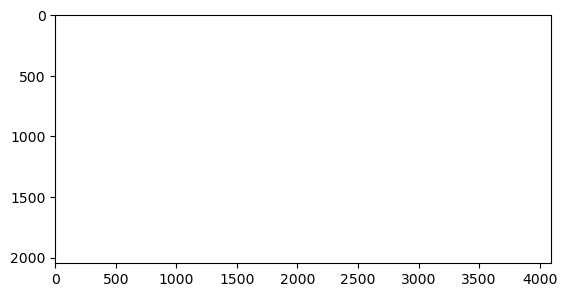

nan

/Users/urahyou/opt/miniconda3/envs/astro_urahyou/lib/python3.7/site-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


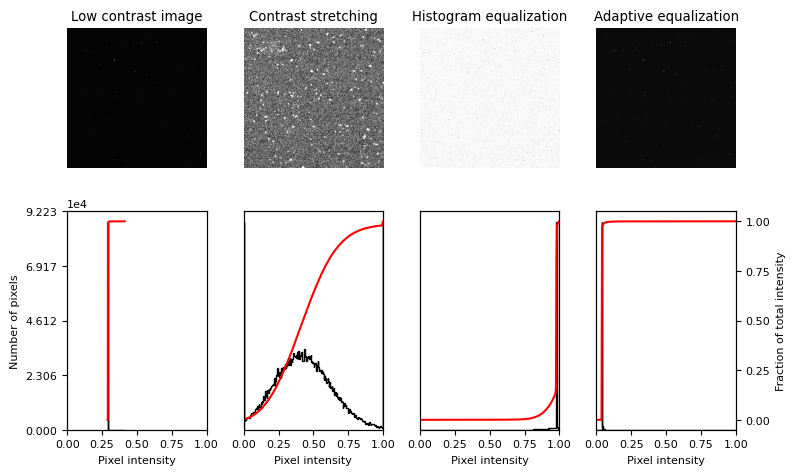

In [349]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8

#画直方图
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
#img = data.moon()   #低对比度图像
img = hdul[1].data.astype('float64')
img = (img-np.min(img))/(np.max(img)-np.min(img))
img = img[:300,:300]

# Contrast stretching    #对比度拉伸
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
#in_range 表示输入图片的强度范围，默认为'image', 表示用图像的最大/最小像素值作为范围

# Equalization
img_eq = exposure.equalize_hist(img)   #直方图均衡化

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)  # 自适应均衡

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')  

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')  

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization') 

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization') 

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()



In [297]:
img.shape

(2048, 4096)

(array([ 5223.,  7360., 12500., 16297., 16554., 13546.,  8844.,  4741.,
         2181.,  2754.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

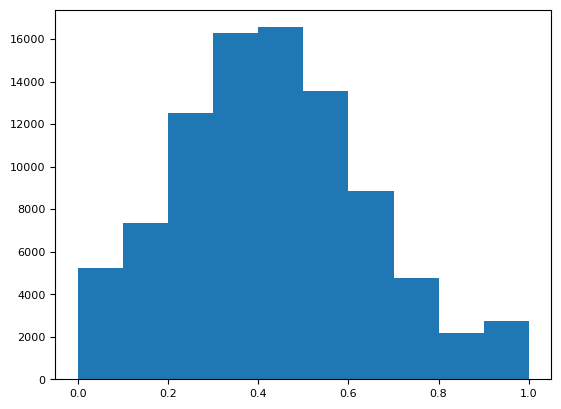

In [350]:
plt.hist(img_rescale.reshape(-1))

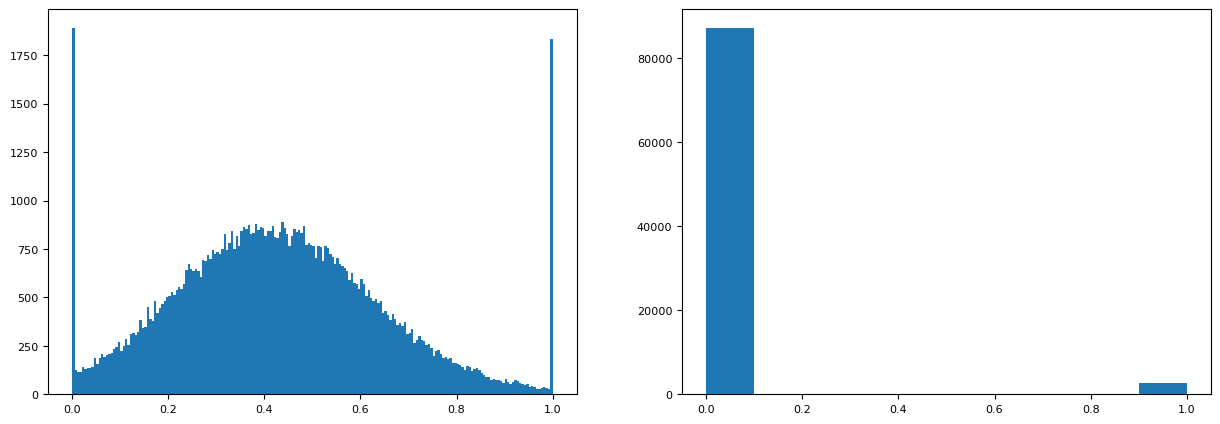

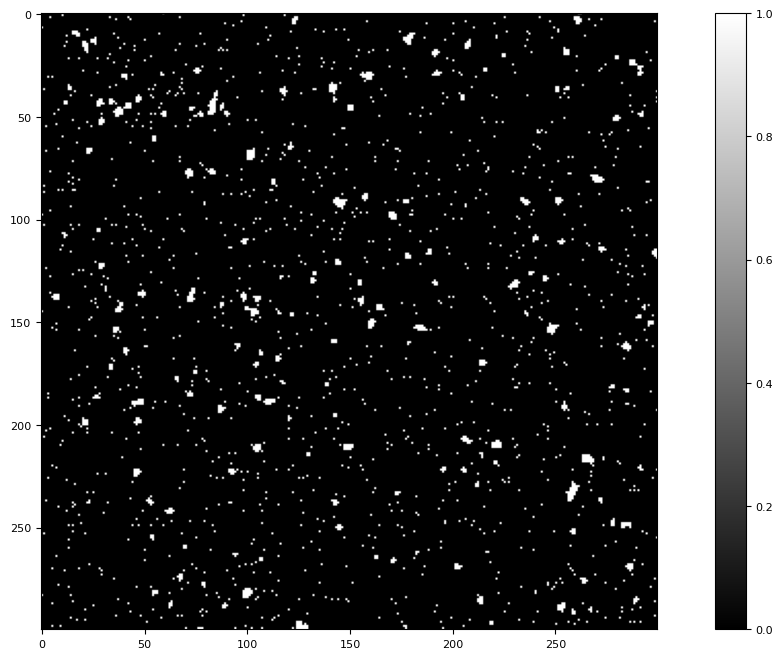

In [351]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(img_rescale.reshape(-1),bins=200)
img1 = img_rescale.copy()
img1[img_rescale<0.9]=0
img1[img_rescale>=0.9]=1
plt.subplot(122)
plt.hist(img1.reshape(-1))
plt.figure(figsize=(15,8))
plt.imshow(img1,cmap='gray')
plt.colorbar()

In [352]:
openimg = morphology.opening(img1)

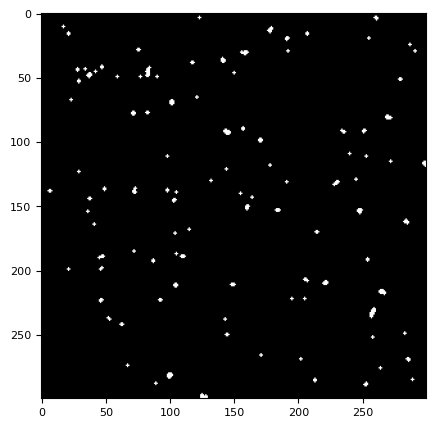

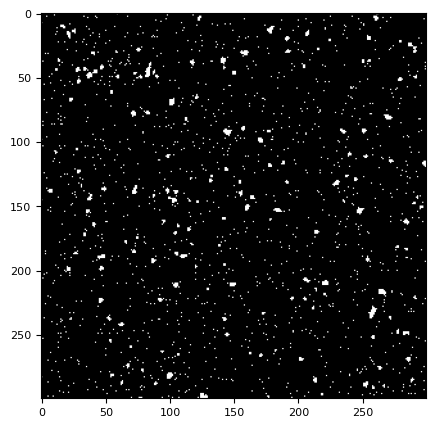

In [353]:
plt.figure(figsize=(16,5))
plt.imshow(openimg,'gray')
plt.figure(figsize=(16,5))
plt.imshow(img1,'gray')

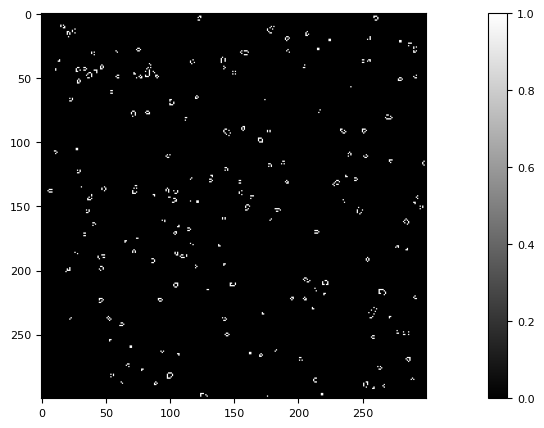

In [355]:
from skimage import feature

edge1 = feature.canny(img1,sigma=0.5)
plt.figure(figsize=(16,5))
plt.imshow(img1*edge1,'gray')
plt.colorbar()

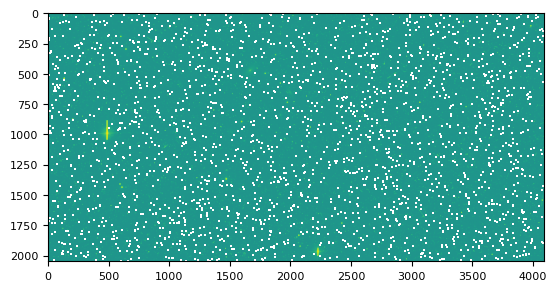

In [417]:
img = hdul[1].data.astype('float32')
img2=fits.getdata('jbit11e1q_flc.fits')
fft = np.fft.fft2(img2)
from matplotlib.colors import LogNorm
plt.imshow(img2,log=True)


In [409]:
fft_power = abs(fft)

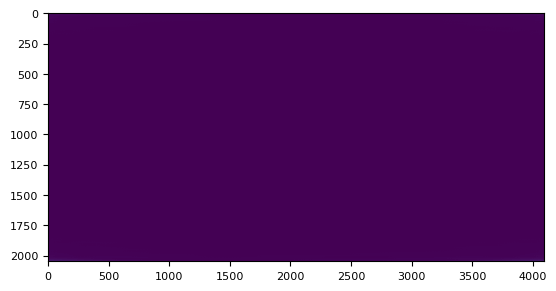

In [411]:
plt.imshow(abs(fft_power))

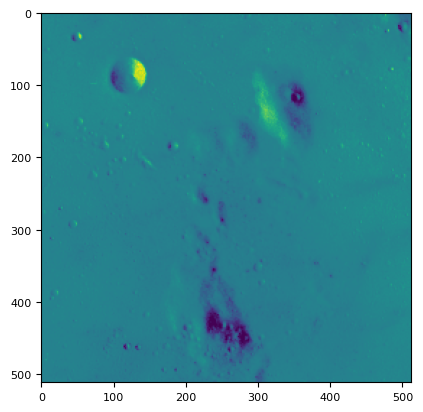

In [382]:
plt.imshow(data.moon())

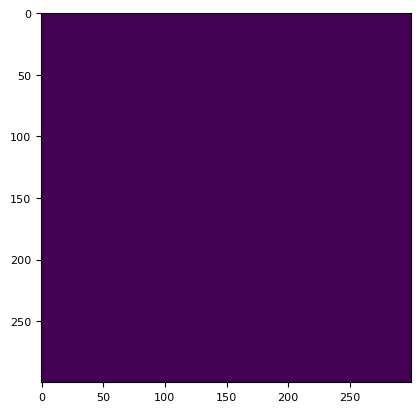

In [406]:
ifft = np.fft.ifft(fft)
plt.imshow(abs(ifft))